__Dataset__:
- Detecting occupancy in the room based on sensor data
- Data source: UCI

__Project Goal__: Compare performance of different classification methods.

__Methods Used__: Experiment Naive Bayes and Logistic Regression for classification

**[Results](#result)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
#Function to plot tables side by side
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell'''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [3]:
data_training = pd.read_csv(r'')
data_training= pd.concat([data_training,pd.read_csv(r'')])
data_training= pd.concat([data_training,pd.read_csv(r'')])

In [4]:
print (data_training.head(2))


                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   

   Occupancy  
1          1  
2          1  


In [5]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20560 entries, 1 to 9752
Data columns (total 7 columns):
date             20560 non-null object
Temperature      20560 non-null float64
Humidity         20560 non-null float64
Light            20560 non-null float64
CO2              20560 non-null float64
HumidityRatio    20560 non-null float64
Occupancy        20560 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB


# Data preparation

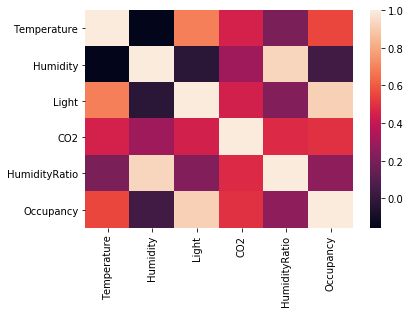

In [6]:
#Identifying Correlation between attributes
corr = data_training.corr()
sns.heatmap(corr)
plt.show()

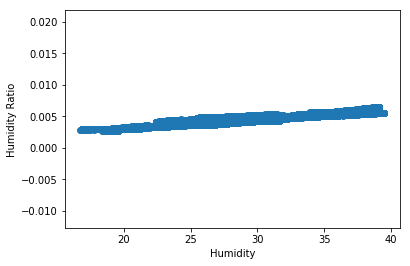

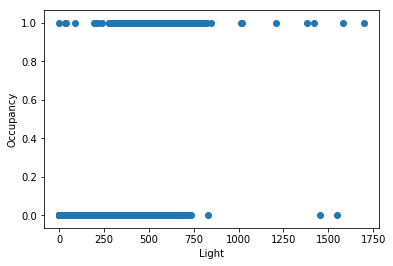

In [7]:
plt.scatter(data_training['Humidity'],data_training['HumidityRatio'])
plt.xlabel('Humidity')
plt.ylabel('Humidity Ratio')
plt.show()

plt.scatter(data_training['Light'],data_training['Occupancy'])
plt.xlabel('Light')
plt.ylabel('Occupancy')
plt.show()

In [8]:
# We will drop humidity Ratio since it is correlated with humidity and will cause multicollinearity

In [9]:
data_training.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [10]:
from datetime import datetime

In [11]:
#keeping hour and rearranging the columns

def hour_arrange(df): 
    df['hour']= pd.to_datetime(df['date']).dt.hour
    cols = df.columns.tolist()
    cols = cols[-1:]+cols[1:-3]+[cols[-2]]
    df = df[cols]
    return df

In [12]:
data_train = hour_arrange(data_training)

In [13]:
data_train.head()

,hour,Temperature,Humidity,Light,CO2,Occupancy
1,17,23.18,27.2720,426.0,721.25,1
2,17,23.15,27.2675,429.5,714.00,1
3,17,23.15,27.2450,426.0,713.50,1
4,17,23.15,27.2000,426.0,708.25,1
5,17,23.10,27.2000,426.0,704.50,1


In [14]:
data_train.columns

Index(['hour', 'Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy'], dtype='object')

In [15]:
data_features = data_train.iloc[:,:-1]
data_target = data_train.iloc[:,-1]

In [16]:
data_target.head()

1    1
2    1
3    1
4    1
5    1
Name: Occupancy, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split data
x_train,x_test,y_train,y_test = train_test_split(data_features,data_target,test_size = 0.3,shuffle=True)

In [19]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [20]:
train_scaler = StandardScaler().fit(x_train.iloc[:,:-1])
train_scaled = pd.DataFrame(train_scaler.transform(x_train.iloc[:,:-1]),index=x_train.index,columns=x_train.columns[:-1])

In [21]:
test_scaled = pd.DataFrame(train_scaler.transform(x_test.iloc[:,:-1]),index=x_test.index,columns=x_test.columns[:-1])

# Classification

- We try two classifiers and evaluate their performance.

    - Naive Bayes
    - Logistic Regression

# Naive Bayes

In [22]:
#Using Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [23]:
gauss_model = GaussianNB().fit(train_scaled,np.ravel(y_train))

In [24]:
predicted_guass = gauss_model.predict(test_scaled)

In [26]:
print(classification_report(y_test,predicted_guass))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4735
           1       0.87      1.00      0.93      1433

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.95      6168
weighted avg       0.97      0.97      0.97      6168



In [27]:
from sklearn.linear_model import LogisticRegression

#### Don't know how logistic regression works? Refer to my article [here](https://nbviewer.jupyter.org/github/rushi-sheth/Machine-Learning-Projects/blob/master/Occupancy%20Detection.ipynb) on how machine learning algorithms work.

In [28]:
log = LogisticRegression(solver='lbfgs').fit(train_scaled,np.ravel(y_train))
predicted_log = log.predict(test_scaled)
print(classification_report(y_test,predicted_log))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4735
           1       0.96      1.00      0.98      1433

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



<a id='result'></a>

We observe that the overall accuracy of Logistic Regression is 99% while Naive Bayes is 98%. Even though it is only 1%, if we compare the precision, we see some difference between both the algorithms.<br><br>
To learn more about precision and recall, check my notebook on classification metrics [here]

 Let's consider two cases:

1. We use this model for some R&D lab, where we want to detect occupancy in the isolated room. We want triggers to go off if someone is in the room. 

    - If we compare LR and Naive Bayes, we observe that NB has poor precision compared to LR. That means, we will get more false positives and alarms will go off even if there are no occupants in the room. Considering the application, we don't want people to be in contact with dangerous viruses, so we are with false alarms. LR will be accurate, but we have nothing to lose if NB is used.
<br><br>
2. Let's assume the earth is infected with deadly bacterias and we are living on Mars in an enclosed bunker with limited oxygen supply. If we disconnect the oxygen supply, we die. But, we cannot have false occupancy because that will be a waste of oxygen. We want to be as accurate as possible.
    - In this case, we cannot afford false positives. So it is better to use LR model.